In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, concat
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [27]:
steroid = pd.read_csv('data/data.csv', sep=',', header=1, index_col=0)

target = "death"

# convert 'ND' to nan
steroid = steroid.replace('ND', np.nan)
steroid = steroid.replace('NA', np.nan)
steroid = steroid.replace('NE', np.nan)

# plot histograms for each variable
#steroid.hist(figsize = (12, 12))

# missing values

# perform missing values impuation for bun, rr, hr using median
steroid['bun'].fillna(steroid['bun'].median(), inplace=True)
steroid['rr'].fillna(steroid['rr'].median(), inplace=True)
steroid['hr'].fillna(steroid['hr'].median(), inplace=True)
# perform missing values imputation for ams and intubation using mode
steroid['ams'].fillna(steroid['ams'].mode()[0], inplace=True)
steroid['intubation'].fillna(steroid['intubation'].mode()[0], inplace=True)

print(steroid.isnull().sum())

# perform normalizaton using min max scaler
# scaling
scaler = MinMaxScaler()
y = steroid[target]
triage = steroid.drop(columns=[target], axis=1)
triage = pd.DataFrame(scaler.fit_transform(triage), columns=triage.columns)
triage[target] = y

# perform oversampling using SMOTE
X = steroid.drop(columns=[target])
y = steroid[target]
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
steroid = pd.concat([X, y], axis=1)



age                          0
gender                       0
steroid                      0
hospital                     0
adl                          0
wheeze                       0
bun                          0
rr                           0
ams                          0
hr                           0
hot                          0
stability                    0
time_to_stability            0
death                        0
non_informative_cencoring    0
discharge                    0
intubation                   0
hospitalization              0
dtype: int64


0.8051948051948052


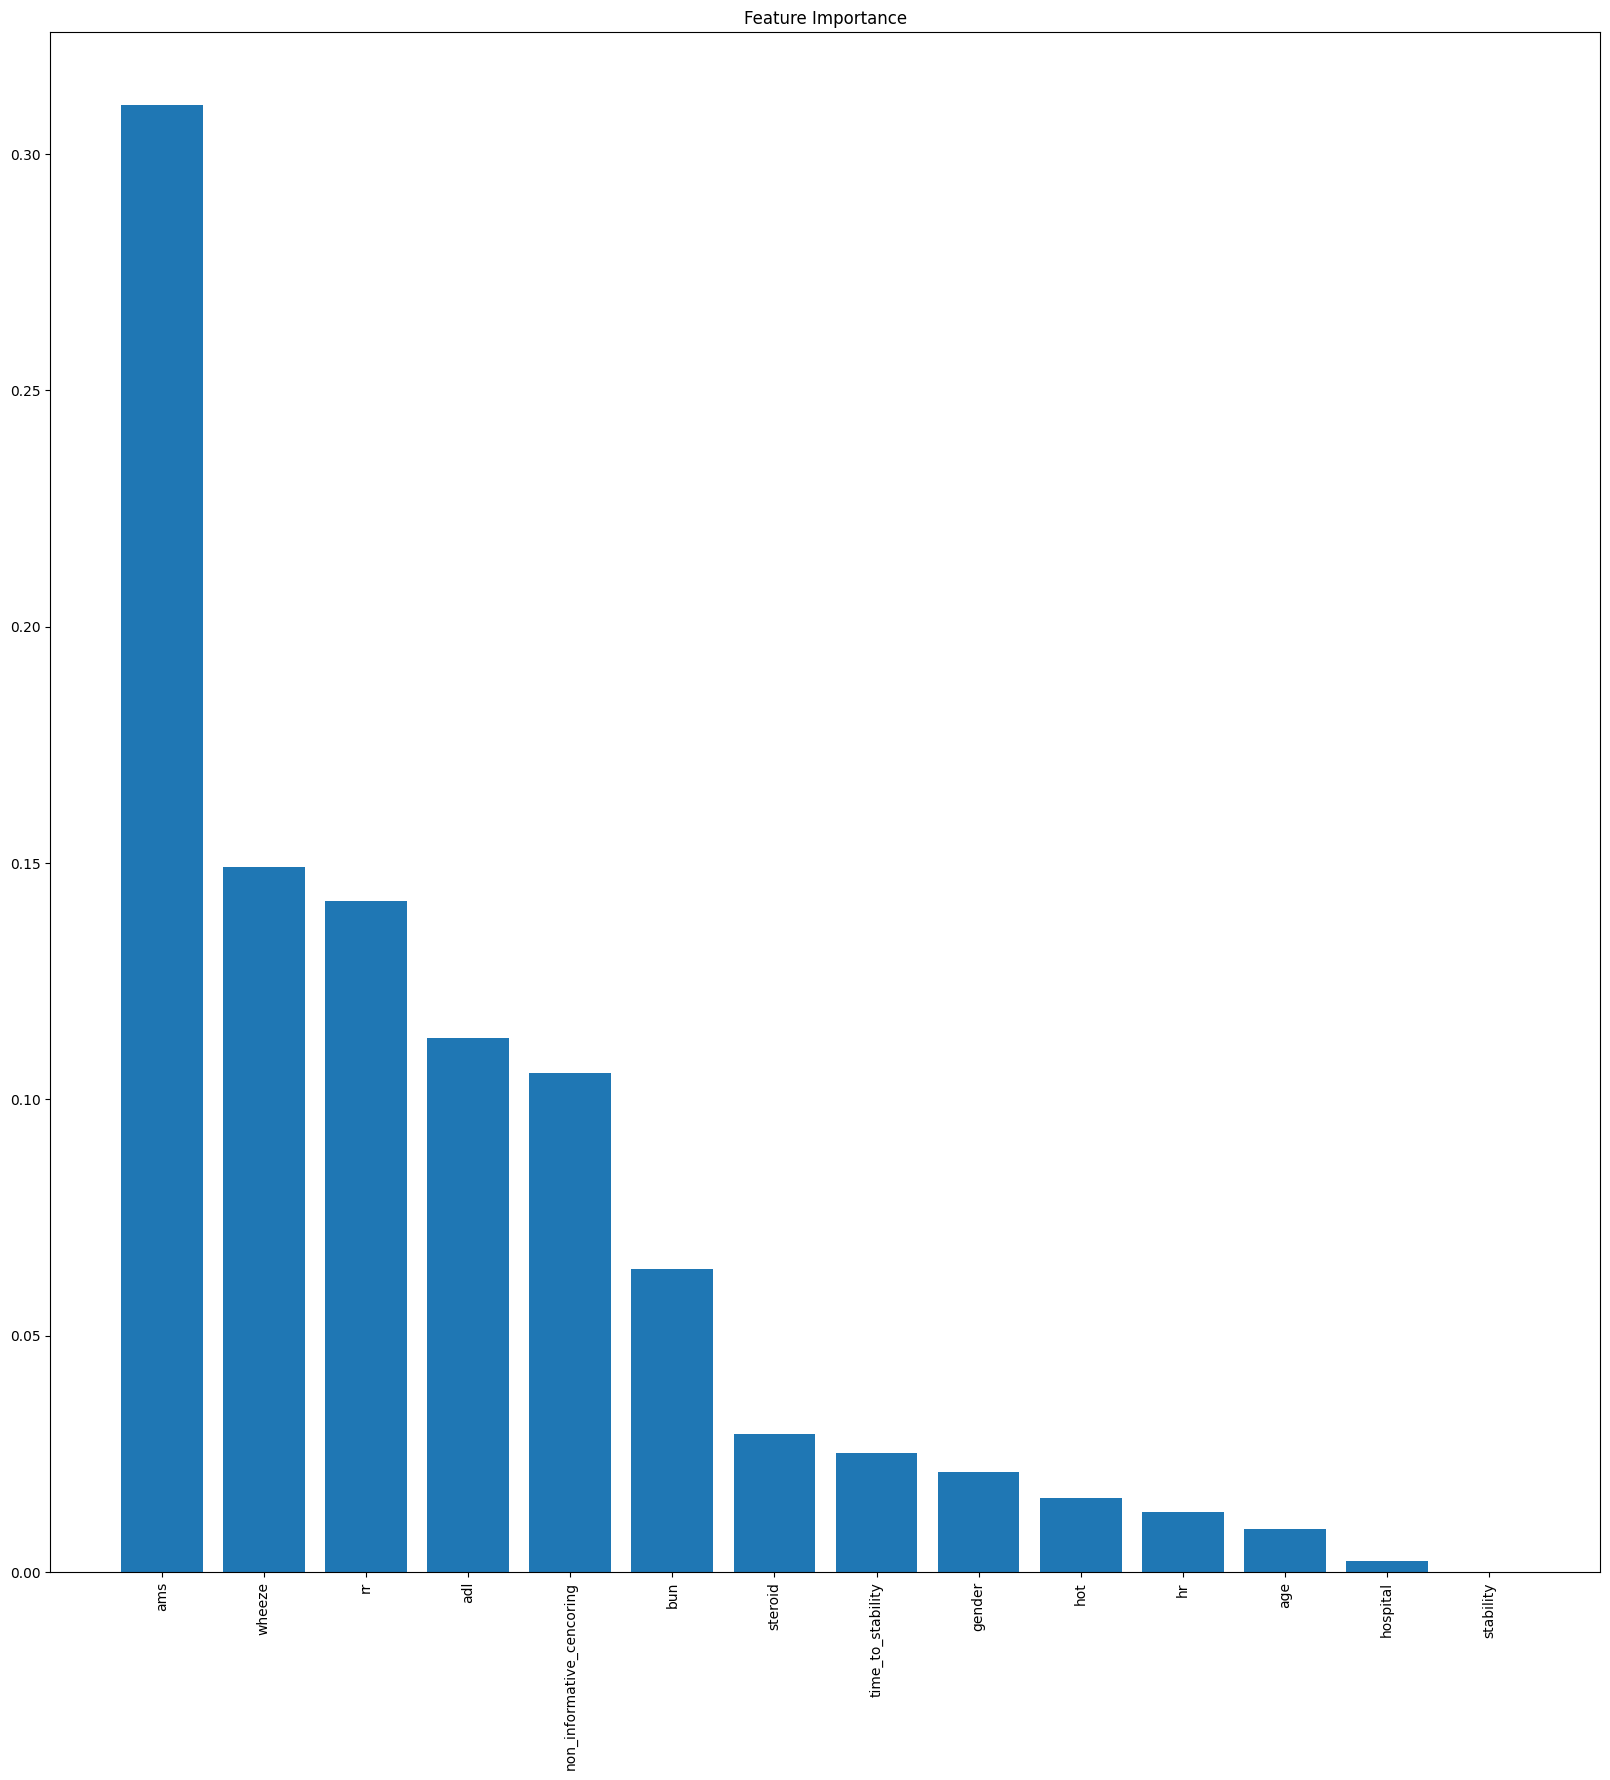

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# drop discharge variable
steroid = steroid.drop(columns=['discharge', 'time_to_stability', 'stability'], axis=1)

X = steroid.drop(columns=[target])
y = steroid[target]

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

# get variable importances
importances = clf.feature_importances_
# sort in descending order
indices = np.argsort(importances)[::-1]
# rearrange feature names so they match the sorted feature importances
names = [triage.columns[i] for i in indices]
# create plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")
# add bars
plt.bar(range(X.shape[1]), importances[indices])
# add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# show plot
plt.show()